In [0]:
import torch
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Activation,Flatten, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import binary_crossentropy

In [0]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns

In [0]:
devices = tf.config.experimental.list_physical_devices('GPU')
print("GPU:", len(devices))

GPU: 0


In [0]:
from timeit import default_timer as timer
def print_train_time(start: float,
                     end: float,
                     device: torch.device = None):
  total_time = end - start
  print(f"Train time on {device}: {total_time:.3f} seconds")
  return total_time

In [0]:
df = pd.read_csv("/Workspace/Users/bellayu1600@gmail.com/data.csv")

In [0]:
print(df.describe().T)

                         count          mean  ...           75%           max
id                       569.0  3.037183e+07  ...  8.813129e+06  9.113205e+08
radius_mean              569.0  1.412729e+01  ...  1.578000e+01  2.811000e+01
texture_mean             569.0  1.928965e+01  ...  2.180000e+01  3.928000e+01
perimeter_mean           569.0  9.196903e+01  ...  1.041000e+02  1.885000e+02
area_mean                569.0  6.548891e+02  ...  7.827000e+02  2.501000e+03
smoothness_mean          569.0  9.636028e-02  ...  1.053000e-01  1.634000e-01
compactness_mean         569.0  1.043410e-01  ...  1.304000e-01  3.454000e-01
concavity_mean           569.0  8.879932e-02  ...  1.307000e-01  4.268000e-01
concave_points_mean      569.0  4.891915e-02  ...  7.400000e-02  2.012000e-01
symmetry_mean            569.0  1.811619e-01  ...  1.957000e-01  3.040000e-01
fractal_dimension_mean   569.0  6.279761e-02  ...  6.612000e-02  9.744000e-02
radius_se                569.0  4.051721e-01  ...  4.789000e-01 

In [0]:
print(df.isnull().sum())

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave_points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave_points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave_points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64


In [0]:
df = df.rename(columns={'diagnosis':'label'})
print(df.dtypes)

id                           int64
label                       object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave_points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave_points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

In [0]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()

# Convert M (maligant) and B (benign) to 1 and 0
before = df["label"].values
print("Prior labels: ", np.unique(before))
after = labelencoder.fit_transform(before)
print("Changed labels: ", np.unique(after))

Prior labels:  ['B' 'M']
Changed labels:  [0 1]


In [0]:
# Scale data
X = df.drop(labels = ["label", "id"], axis=1) 
print(X.describe().T)

                         count        mean  ...          75%         max
radius_mean              569.0   14.127292  ...    15.780000    28.11000
texture_mean             569.0   19.289649  ...    21.800000    39.28000
perimeter_mean           569.0   91.969033  ...   104.100000   188.50000
area_mean                569.0  654.889104  ...   782.700000  2501.00000
smoothness_mean          569.0    0.096360  ...     0.105300     0.16340
compactness_mean         569.0    0.104341  ...     0.130400     0.34540
concavity_mean           569.0    0.088799  ...     0.130700     0.42680
concave_points_mean      569.0    0.048919  ...     0.074000     0.20120
symmetry_mean            569.0    0.181162  ...     0.195700     0.30400
fractal_dimension_mean   569.0    0.062798  ...     0.066120     0.09744
radius_se                569.0    0.405172  ...     0.478900     2.87300
texture_se               569.0    1.216853  ...     1.474000     4.88500
perimeter_se             569.0    2.866059  ...    

In [0]:
MANUAL_SEED = 42

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=MANUAL_SEED)
print("Train data shape: ", X_train.shape)
print("Test data shape: ", X_test.shape)

Train data shape:  (455, 30)
Test data shape:  (114, 30)


In [0]:
time_start = timer()
model_0 = Sequential([
    Dense(units=16, input_dim=30, activation='relu'), 
    Dense(units=32, activation='relu'),
    Dense(units=64, activation='relu'),
    Dropout(0.2),
    Dense(units=1, activation='sigmoid')
])

In [0]:
model_0.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

# Print time for the model
time_end = timer()
total_train_time_model_0 = print_train_time(start=time_start,
                                            end=time_end)
model_0.summary()

Train time on None: 13.215 seconds
Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_36 (Dense)            (None, 16)                496       
                                                                 
 dense_37 (Dense)            (None, 32)                544       
                                                                 
 dense_38 (Dense)            (None, 64)                2112      
                                                                 
 dropout_13 (Dropout)        (None, 64)                0         
                                                                 
 dense_39 (Dense)            (None, 1)                 65        
                                                                 
Total params: 3217 (12.57 KB)
Trainable params: 3217 (12.57 KB)
Non-trainable params: 0 (0.00 Byte)
__________________________________________________

In [0]:
results = model_0.fit(x=X_train, 
                      y=y_train,
                      epochs=100, 
                      batch_size=32,
                      shuffle=True,
                      verbose=1,
                      validation_data=(X_test, y_test))

Epoch 1/100
 1/15 [=>............................] - ETA: 12s - loss: 14.0305 - accuracy: 0.3125WARNING:tensorflow:Callback method `on_train_batch_end` is slow compared to the batch time (batch time: 0.0016s vs `on_train_batch_end` time: 0.0025s). Check your callbacks.


15/15 [==============================] - 1s 26ms/step - loss: 13.0170 - accuracy: 0.4659 - val_loss: 0.3587 - val_accuracy: 0.8947
Epoch 2/100
15/15 [==============================] - 0s 4ms/step - loss: 7.0922 - accuracy: 0.5385 - val_loss: 0.2165 - val_accuracy: 0.9298
Epoch 3/100
15/15 [==============================] - 0s 4ms/step - loss: 5.1439 - accuracy: 0.6330 - val_loss: 0.6979 - val_accuracy: 0.9035
Epoch 4/100
15/15 [==============================] - 0s 4ms/step - loss: 3.0079 - accuracy: 0.7341 - val_loss: 0.2007 - val_accuracy: 0.9474
Epoch 5/100
15/15 [==============================] - 0s 4ms/step - loss: 1.7386 - accuracy: 0.8418 - val_loss: 1.1511 - val_accuracy: 0.7632
Epoch 6/100
15/15 [==============================] - 0s 5ms/step - loss: 1.9878 - accuracy: 0.8154 - val_loss: 0.1935 - val_accuracy: 0.9386
Epoch 7/100
15/15 [==============================] - 0s 4ms/step - loss: 0.9545 - accuracy: 0.8615 - val_loss: 0.3077 - val_accuracy: 0.9561
Epoch 8/100
15/15 [====

INFO:tensorflow:Assets written to: /local_disk0/repl_tmp_data/ReplId-f8e4d-ff24e-2e734/tmpo1_l509m/model/data/model/assets


Uploading artifacts:   0%|          | 0/11 [00:00<?, ?it/s]

Uploading artifacts:   0%|          | 0/2 [00:00<?, ?it/s]

4/4 [==============================] - 0s 2ms/step


<Axes: >

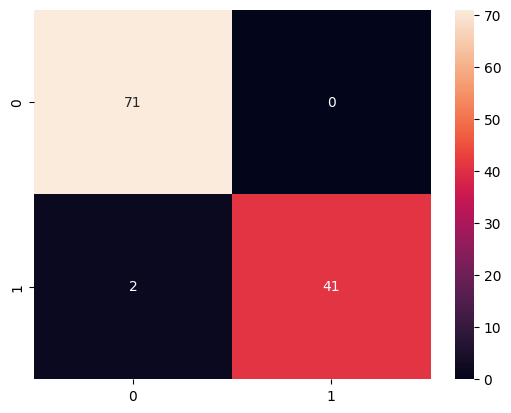

In [0]:
y_pred = model_0.predict(X_test)
y_pred = (y_pred > 0.5)

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True)